<a href="https://colab.research.google.com/github/Al31415/mudlog/blob/main/Assignment0_AlaguvalliappanThiagarajan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Course Policies

1. List the communication channels available to you in this course.

Both the professor and the TAs have office hours. In addition, there are Canvas discussion boards and a slack page. For questions that are personal in nature, they can be emailed to catiaspsilva@ece.ufl.edu.

2. Are late assignments acceptable?

While late assignments are accepted before solutions are posted, if an assignment is turned in late, the on time points are lost.

3. What to do if you feel that an assignment needs to be re-graded?

You need to get into contact with the professor with 1 week of grades being posted.

4. What constitutes healthy collaboration and when to cite another student?

Healthy collaboration includes discussing course material and assignments for better understanding and aiding in general programming and debugging issues. You should cite another student if they help substantially in your understanding of the problem.

# Assignment 0

In [49]:
#imports
from google.colab import files
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
from scipy import stats

## UF Dataset

In [3]:
uploaded = files.upload()

Saving UF_data.npy to UF_data.npy


In [7]:
Data_2d= np.load(io.BytesIO(uploaded['UF_data.npy']))

In [15]:
Data_2d_1=np.array([Data for Data in Data_2d if Data[2]==1])
Data_2d_0=np.array([Data for Data in Data_2d if Data[2]==0])

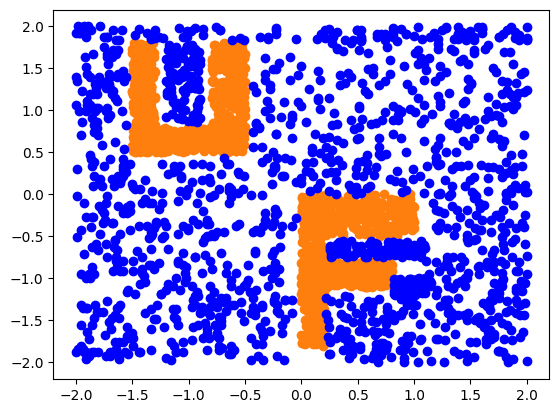

In [26]:
plt.plot(Data_2d_1[:, 0], Data_2d_1[:, 1], 'o', color='tab:orange')
plt.plot(Data_2d_0[:, 0], Data_2d_0[:, 1], 'o', color='blue')


## Computer Hardware Dataset

In [23]:
uploaded = files.upload()

Saving computer_hardware.csv to computer_hardware.csv


In [42]:
df= pd.read_csv(io.BytesIO(uploaded['computer_hardware.csv']))

In [43]:
scaler = MinMaxScaler()
df[df.columns]=scaler.fit_transform(df)
df

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,RP
0,0.072825,0.006012,0.092843,1.000,0.307692,0.727273,0.167832
1,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.229895
2,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.187063
3,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.145105
4,0.008092,0.248497,0.249249,0.125,0.153846,0.090909,0.110140
...,...,...,...,...,...,...,...
204,0.072151,0.029309,0.124124,0.000,0.019231,0.045455,0.031469
205,0.054619,0.029309,0.124124,0.125,0.038462,0.045455,0.034965
206,0.072825,0.060621,0.124124,0.000,0.038462,0.079545,0.040210
207,0.312205,0.014028,0.124124,0.125,0.000000,0.000000,0.053322


array([[<Axes: xlabel='MYCT', ylabel='MYCT'>,
        <Axes: xlabel='MMIN', ylabel='MYCT'>,
        <Axes: xlabel='MMAX', ylabel='MYCT'>,
        <Axes: xlabel='CACH', ylabel='MYCT'>,
        <Axes: xlabel='CHMIN', ylabel='MYCT'>,
        <Axes: xlabel='CHMAX', ylabel='MYCT'>,
        <Axes: xlabel='RP', ylabel='MYCT'>],
       [<Axes: xlabel='MYCT', ylabel='MMIN'>,
        <Axes: xlabel='MMIN', ylabel='MMIN'>,
        <Axes: xlabel='MMAX', ylabel='MMIN'>,
        <Axes: xlabel='CACH', ylabel='MMIN'>,
        <Axes: xlabel='CHMIN', ylabel='MMIN'>,
        <Axes: xlabel='CHMAX', ylabel='MMIN'>,
        <Axes: xlabel='RP', ylabel='MMIN'>],
       [<Axes: xlabel='MYCT', ylabel='MMAX'>,
        <Axes: xlabel='MMIN', ylabel='MMAX'>,
        <Axes: xlabel='MMAX', ylabel='MMAX'>,
        <Axes: xlabel='CACH', ylabel='MMAX'>,
        <Axes: xlabel='CHMIN', ylabel='MMAX'>,
        <Axes: xlabel='CHMAX', ylabel='MMAX'>,
        <Axes: xlabel='RP', ylabel='MMAX'>],
       [<Axes: xlabel='MYCT', y

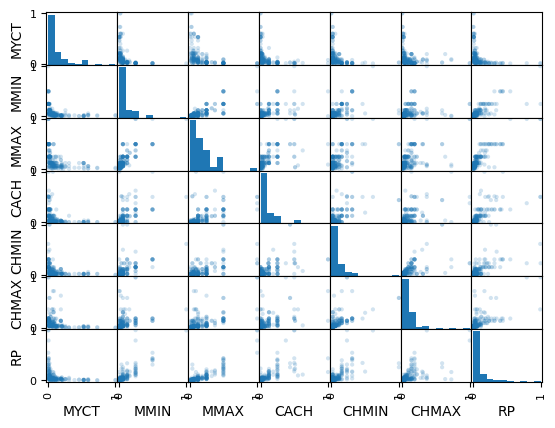

In [44]:
pd.plotting.scatter_matrix(df, alpha=0.2)

In [45]:
df.corr(method='pearson')

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,RP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209
RP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000


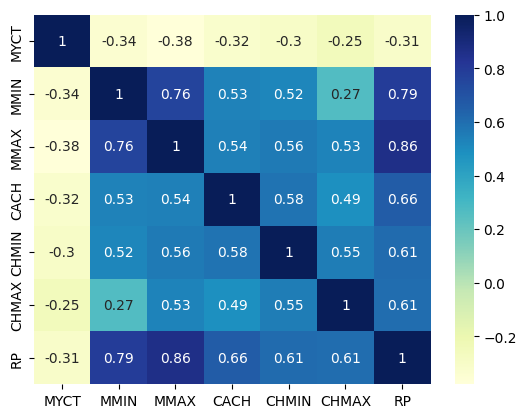

In [48]:
dataplot = sb.heatmap(df.corr(method='pearson'), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

As we can see from the preceding heatmap, since the variable maximum main memory in kilobytes (MMAX) has the highest correlation with the relative performance, it has the largest predictive value to predict the computer hardware relative importance.

In [50]:
slope, intercept, r, p, se = stats.linregress(df['MMAX'], df['RP'])

In [53]:
abline_values = [slope * i + intercept for i in df['MMAX']]

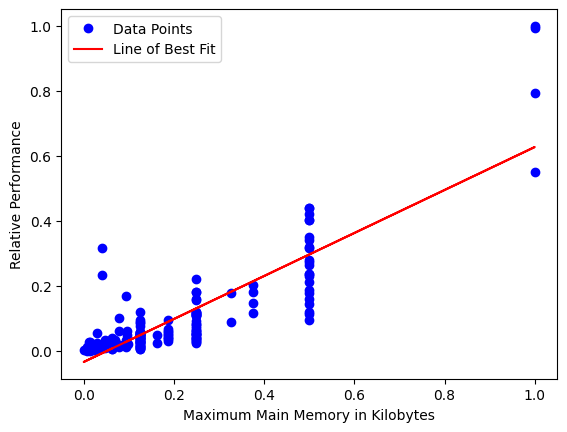

In [65]:
plt.plot(df['MMAX'], df['RP'], 'o', color='b')
plt.plot(df['MMAX'], abline_values, 'r')
plt.xlabel('Maximum Main Memory in Kilobytes')
plt.ylabel('Relative Performance')
plt.legend(["Data Points", "Line of Best Fit"], loc='best')
plt.show()

